<a href="https://colab.research.google.com/github/TheDeas343/MC886/blob/main/MC886_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group information

Names: Andreas Cisi Ramos e João Pedro de Moraes Novaes


RAs: 246932 e 174494

# **Machine Learning MC886/MO444 - Task \#1**: Regression and Classification


### Objective:

To explore **Linear Regression** and **K-Nearest Neighbors** alternatives and come up with the best possible model for the problems. In this work, we will train three models, one for regression, other for binary classification, and the last one for multiclass classification.

## **Linear Regression**

In this section you must load and explore the dataset, and build a linear regressor by hand. No machine learning libraries are allowed. After building your own regressor, you must compare it with the sklearn `SGDRegressor`.


#### **Dataset: Seoul Bike Sharing Demand**

The dataset contains the count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather and date information.

In order to have a good quality of service, the company needs to understand how to distribute and maintain the bicycles available (or even buy more bikes).<br/>
This dataset was collected with the objective to understand which wheater and holiday information impact the number of bikes rented in this system.


Features and the corresponding descriptions:
- **Date** : Date of the sample (year-month-day)
- **Rented Bike count (TARGET)**: Count of bikes rented at this specific hour
- **Hour**: Hour of he day
- **Temperature**:Temperature (in Celsius)
- **Humidity**: Air humidity level (in %)
- **Windspeed**: Average windspeed during this hour (in m/s)
- **Visibility**: Average visibility level during this hour (in 10m)
- **Dew point temperature**: Average temperature where steam condeses into water during this hour (in Celsius)
- **Solar radiation**: Average level of radiation emitted by the sun during this hour (in MJ/m²)
- **Rainfall**: Average rainfall during this hour (in mm)
- **Snowfall**: Average snowfall during this hour (in cm)
- **Seasons**: Season of this date, it can be: Winter, Spring, Summer or Autumn
- **Holiday**: Describes if this date is a Holiday or not (Holiday/No holiday)
- **Functional Day**: Wheter this was a functional day or not (0 = Non Functional Hours, 1 = Functional hours)


**How to load the dataset**

Dataset folder link: [here](https://drive.google.com/drive/folders/14uiy_7xMq5LOqODBzbIJLD4Vq0E9XD5v?usp=sharing)

You should open the google drive folder, click on the name of the folder on the top and click on "organize" => "add shortcut".<br/>
Then you should choose where to add the shortcut. The recommendation is to add on "MyDrive", so you don't need to change the dataset path used below.

Then you should run the cell below and authorize google drive access.

*If you want to run the notebook locally, just download the folder and change the path below to the location of the folder in your local environment.*

In [119]:
# Imports para todo o script
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import subplots

# Imports do SKLEARN que acrtedito que podem ser usados
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [110]:

# Carregando o dataset localmente
path = "SeoulBikeData.csv" # o arquivo CSV está na mesma pasta que esse scprit do Jupyter, nao sendo necessario adicionar um path
bike_data = pd.read_csv(path)

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset. Remember to avoid using data that you should not have in training.

You can plot graphs with features that you think are important to visualize the relation with the target(`Rented Bike count`). You can also use boxplot graphs to understand feature distributions. There are no minimal/maximum requirements in what graphs you should use, explore just what you think it can help in understanding the dataset.

Check for the dependencies of the features and the target to understand which has bigger impact in it.

The dataset has categorical features that cannot be used in the models. Fix this (Pandas has a built-in function for that!).

Remember that machine learning models are highly affected by the scale of the input features.


## Analisando os Dados

Agora, vamos analisar os Dados Quantitativos com plot de gráficos normais e Dados Qualitativos com plot de bloxpots (baseado nos dados de treino somente)

Analisando os dados plotados podemos ver que certas features apresentam mais influência que outras para o alvo (Rented Bike Count).

**Sobre os dados quantitativos:**

- A Temperatura, Humidade e Visibilidade se assemelham a um comportamento linear. Já a Radiação Solar e Velocidade do Vento parecem não ter muita influência no número de bicicletas alugadas. Além disso, a quantidade de chuva ou neve parecem forçar um comportamento binário no aluguel de bicicletas, ou seja , se chover ou nevar o número de alugueis de bicicletas é quase nulo.


**Sobre os dados qualitativos:**

- O Horário demonstra ter uma maior atividade no periódo final da tarde-noite (17h - 19h), as Estações Mostram ter uma maior atividade no Verão. Já o Feriado mostra ter uma quantidade maior de bikes alugas quando não é feriado, mas parece não depender muito disso. Agora o Dia de Funcionamento mostra que as bikes só são alugadas caso o estabelecimento esta funcionando.



In [111]:
## Analisando o dataset

print("COLUNAS")
print(bike_data.columns)

print("DATA\n")
print(bike_data)

print("\nSUM OF NULL ENTRIES\n")
print(bike_data.isnull().sum())

print("\nDATA TYPES\n")
print(bike_data.dtypes)


COLUNAS
Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
DATA

            Date  Rented Bike Count  Hour  Temperature(C)  Humidity(%)  \
0     01/12/2017                256     0            -5.2           37   
1     01/12/2017                206     1            -5.5           38   
2     01/12/2017                175     2            -6.0           39   
3     01/12/2017                109     3            -6.2           40   
4     01/12/2017                 80     4            -6.0           36   
...          ...                ...   ...             ...          ...   
8755  30/11/2018               1005    19             4.2           34   
8756  30/11/2018                766    20             3.4           37   
8757  30/11/2018              

### Separando os Dados (Treino x Teste)

Agora que já analisamos entradas vazias e que tipo de dados cada coluna armazena , ou seja, não precisamos fazer um tratamento prévio dos dados.

Podemos, então, separar os dados entre Treino e Teste.

Vale ressaltar que optamos por retirar a coluna 'Date' das variáveis , pois essa teria que ser classificada como categórica e como dificilmente essas categorias iriam se repetir acredito que seriam ruim para o modelo, pois o faria memorizar cada entrada ao invés de usá-las como previsão.

In [125]:
#Training data
X = bike_data.drop(columns=['Rented Bike Count', 'Date']) 
#Target variables
y = bike_data['Rented Bike Count']

# Divisão dos dados para o momento de Treinamento e para o momento de Test/Validação utilizando 30% para Teste e 70% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Plotando gráficos : Dados quantitativos 

Plotando gráficos dos dados que apresentam unidades de medida

Text(0.5, 0, 'Snowfall (cm)')

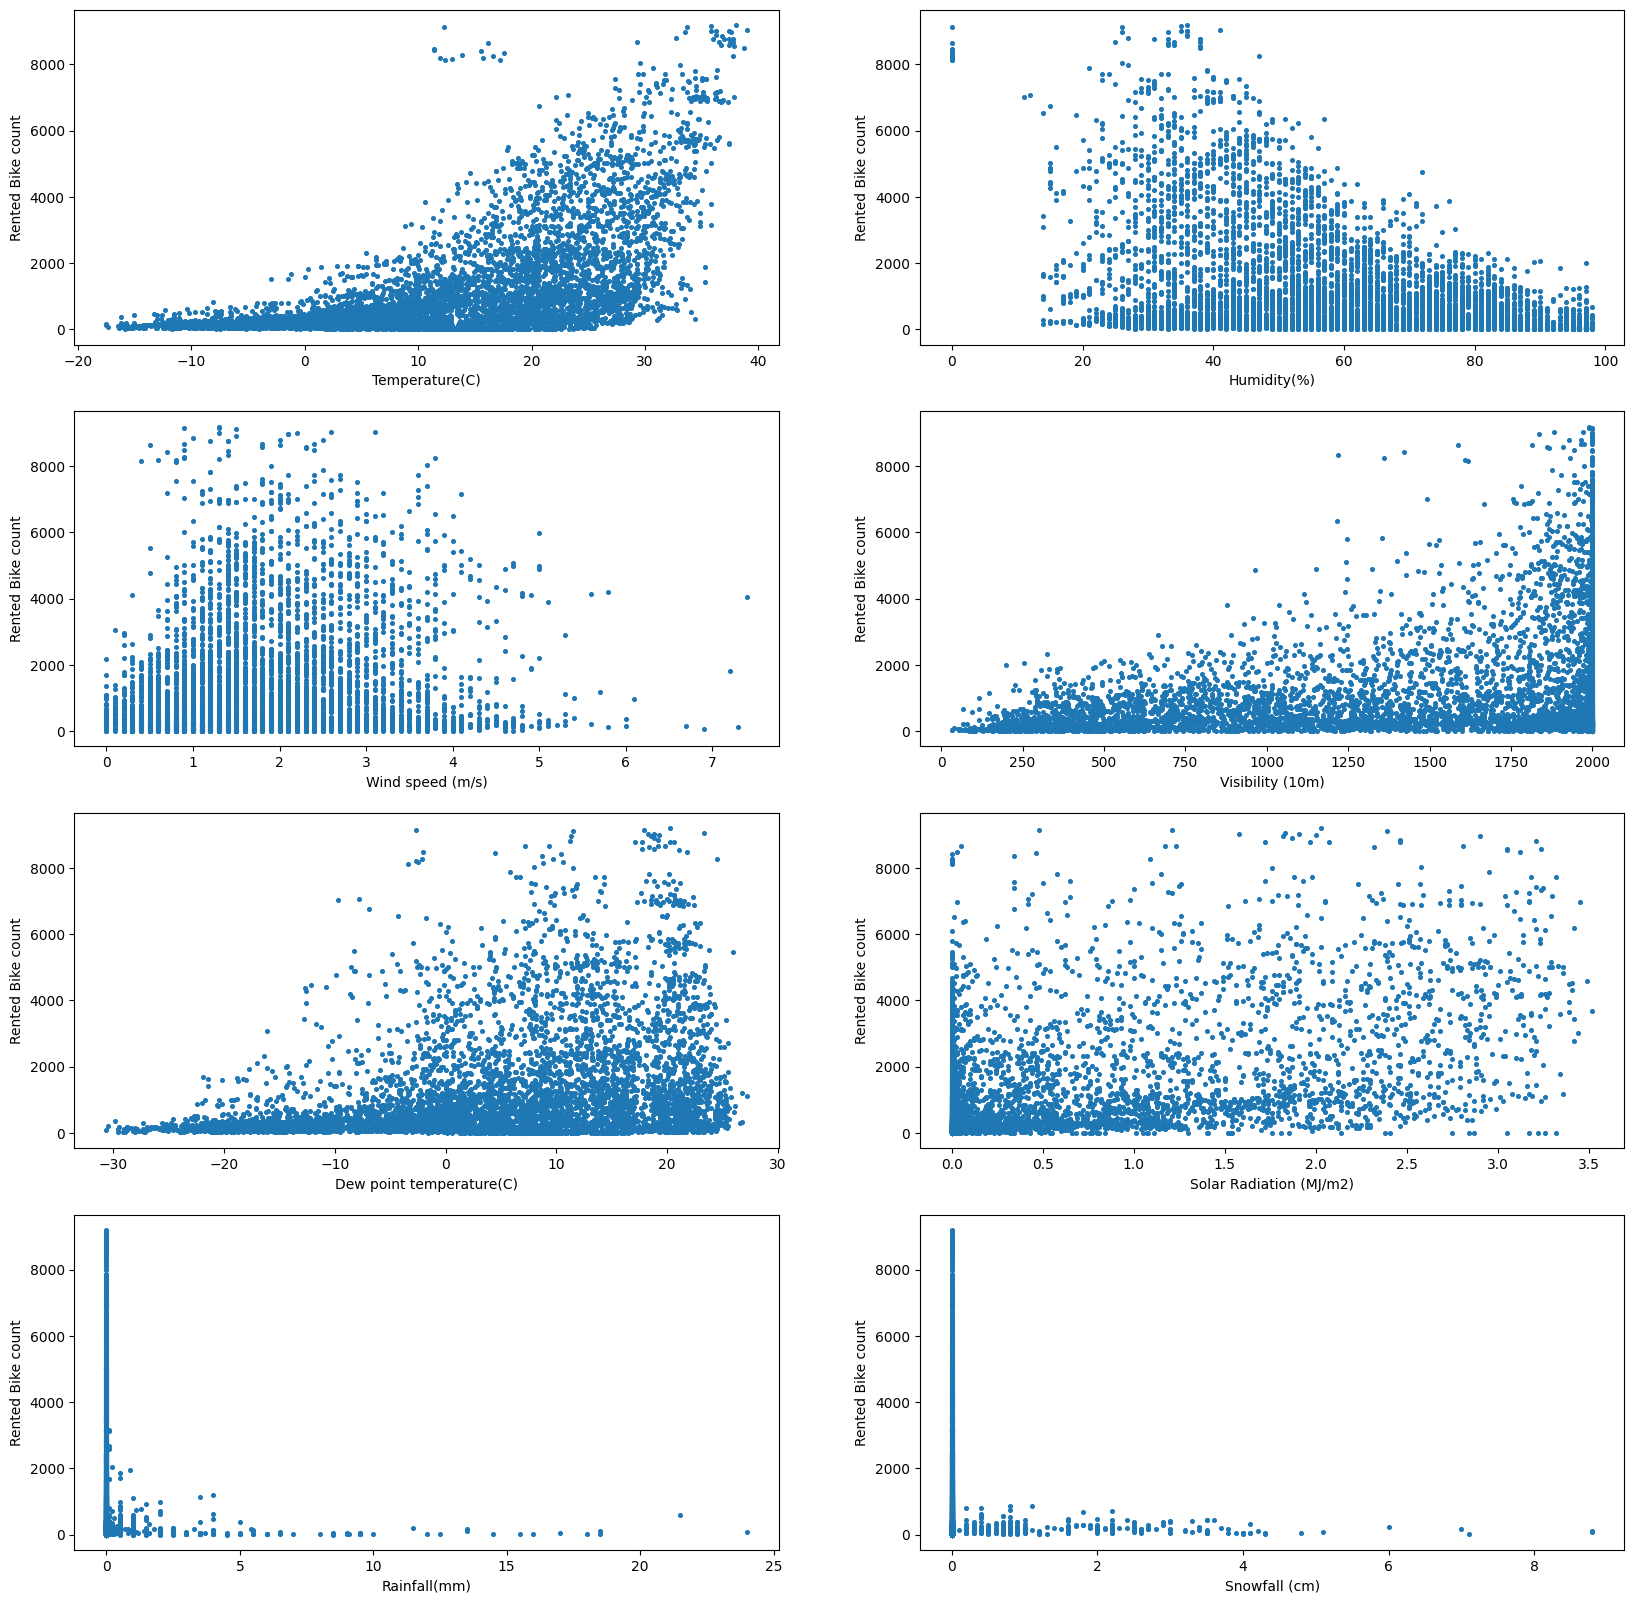

In [113]:
# Plotando os gráficos de dados numéricos (aqueles que tem informação de unidade de medição)


fig, plt = subplots(nrows=4, ncols=2, figsize=(20,20))

for i in range(4):
    for j in range(2):
        plt[i, j].set_ylabel('Rented Bike count')  

# Temperature
plt[0,0].scatter(X_train['Temperature(C)'], y_train, s=7)
plt[0,0].set_xlabel('Temperature(C)') 

# Humidity
plt[0,1].scatter(X_train['Humidity(%)'], y_train, s=7)
plt[0,1].set_xlabel('Humidity(%)')

# Wind speed (m/s)
plt[1,0].scatter(X_train['Wind speed (m/s)'], y_train, s=7)
plt[1,0].set_xlabel('Wind speed (m/s)')

# Visibility (10m)
plt[1,1].scatter(X_train['Visibility (10m)'], y_train, s=7)
plt[1,1].set_xlabel('Visibility (10m)')

# Dew point temperature(C)
plt[2,0].scatter(X_train['Dew point temperature(C)'], y_train, s=7)
plt[2,0].set_xlabel('Dew point temperature(C)')

# Solar Radiation (MJ/m2)
plt[2,1].scatter(X_train['Solar Radiation (MJ/m2)'], y_train, s=7)
plt[2,1].set_xlabel('Solar Radiation (MJ/m2)')

# Rainfall(mm)
plt[3,0].scatter(X_train['Rainfall(mm)'], y_train, s=7)
plt[3,0].set_xlabel('Rainfall(mm)')

# Snowfall (cm)
plt[3,1].scatter(X_train['Snowfall (cm)'], y_train, s=7)
plt[3,1].set_xlabel('Snowfall (cm)')


## Plotando gráficos : Dados qualitativos / categóricos

Plotando gráficos dos dados que NÃO apresentam unidades de medida, utilizando BOXBLOT

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

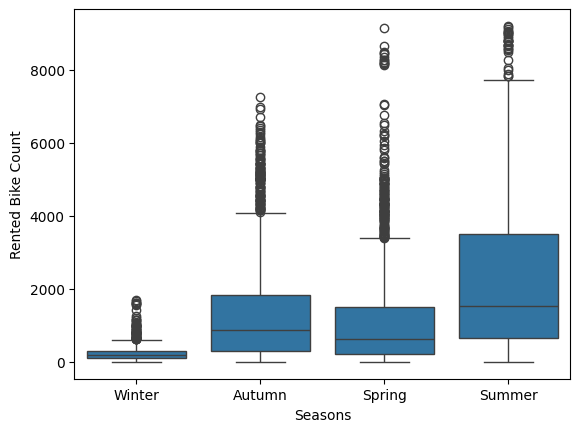

In [114]:
# Plotando os gráficos de dados qualitativos / categóricos (aqueles NÃO que tem informação de unidade de medição)
sns.boxplot(x = X_train['Seasons'], y =y_train)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

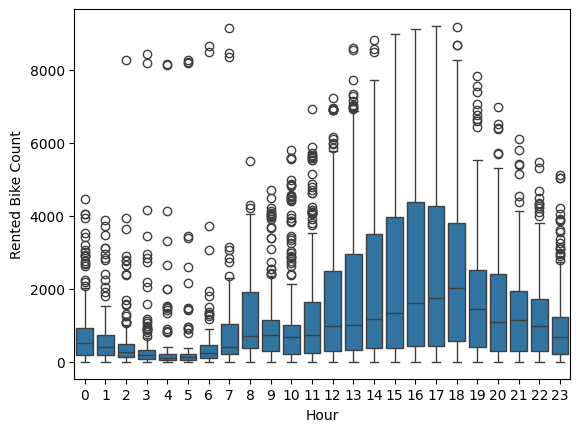

In [115]:
sns.boxplot(x = X_train['Hour'], y =y_train)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

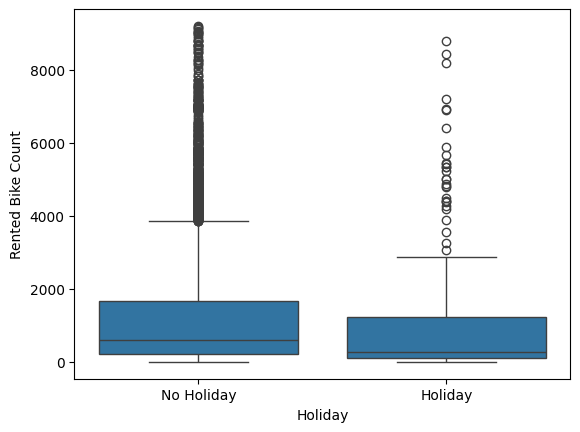

In [116]:
sns.boxplot(x = X_train['Holiday'], y =y_train)

<Axes: xlabel='Functioning Day', ylabel='Rented Bike Count'>

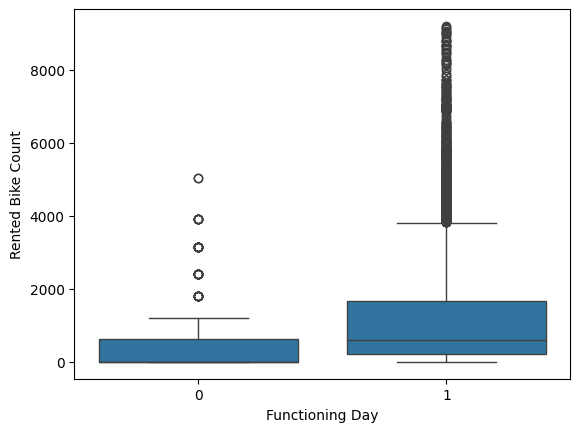

In [41]:
sns.boxplot(x = X_train['Functioning Day'], y =y_train)

**Mutual information**

The mutual information measure is a way to estimate the mutual dependency of two different variables. Therefore, it might be used as an alternative to t- or F-statistic to assess association between a predictor variable $X_i$ and the response variable $Y$.

In that way, we can try to select features in an early stage of the machine learning pipeline, by removing features with low mutual information with the target.

To do this task, use the `mutual_info_regression` function from the Sklearn library. You should pay attention to the *discrete_features* parameter, that should be correctly constructed (all continuous features should be `False` in the array, while others are True). <br/>
The features that are not numbers also need to be converter in order to `mutual_info_regression` to work. To do this you can use Sklearn's [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). This way of encoding is not always appropriate for learning experiments, as ordinal encoding represents a specific order between the categorical values. For the mutual information this is not a problem, but you should not use this encoding for the rest of experiments.

Note: *It is important to notice that this preprocess step has to be done carefully, and is not mandatory for all problems/datasets. The mutual information measure does not take into account the interaction between different features. The basic Linear Regressor also does not use this, so this will most likelly enhance (or at least not worsen) the performance of the model. When using more complex models such as Neural Networks (that we will study in the near future), removing the features that have low direct mutual dependency with the target may worsen our model, as the complex model can find those hidden interactions.*


In [117]:
## check Mutal information

# Transformando dados categóricos usando OrdinalEncoder -> Apenas durante esse teste, depois utilizar o One-Hot encoding
mutual_x_train = X_train.copy() #copiando os dados para o X_train não ser alterado
ordinal_encoder = OrdinalEncoder()
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']
mutual_x_train[categorical_features] = ordinal_encoder.fit_transform(mutual_x_train[categorical_features])

# Calculando informações mutuas entre variaveis e o alvo (Rented Bikes Count)
X = mutual_x_train
y = y_train  # Target variable
mt_info = mutual_info_regression(X, y, discrete_features=[False]*len(X.columns))

# Imprimir o data frame com os valores de Mutual Information Ordenados
mi_df = pd.DataFrame(data={'Feature': X.columns, 'Mutual Information': mt_info})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)


                     Feature  Mutual Information
1             Temperature(C)            0.482967
9                    Seasons            0.276662
0                       Hour            0.255910
2                Humidity(%)            0.247188
5   Dew point temperature(C)            0.208441
6    Solar Radiation (MJ/m2)            0.181446
11           Functioning Day            0.141796
4           Visibility (10m)            0.119201
7               Rainfall(mm)            0.070374
8              Snowfall (cm)            0.044530
3           Wind speed (m/s)            0.027999
10                   Holiday            0.010578


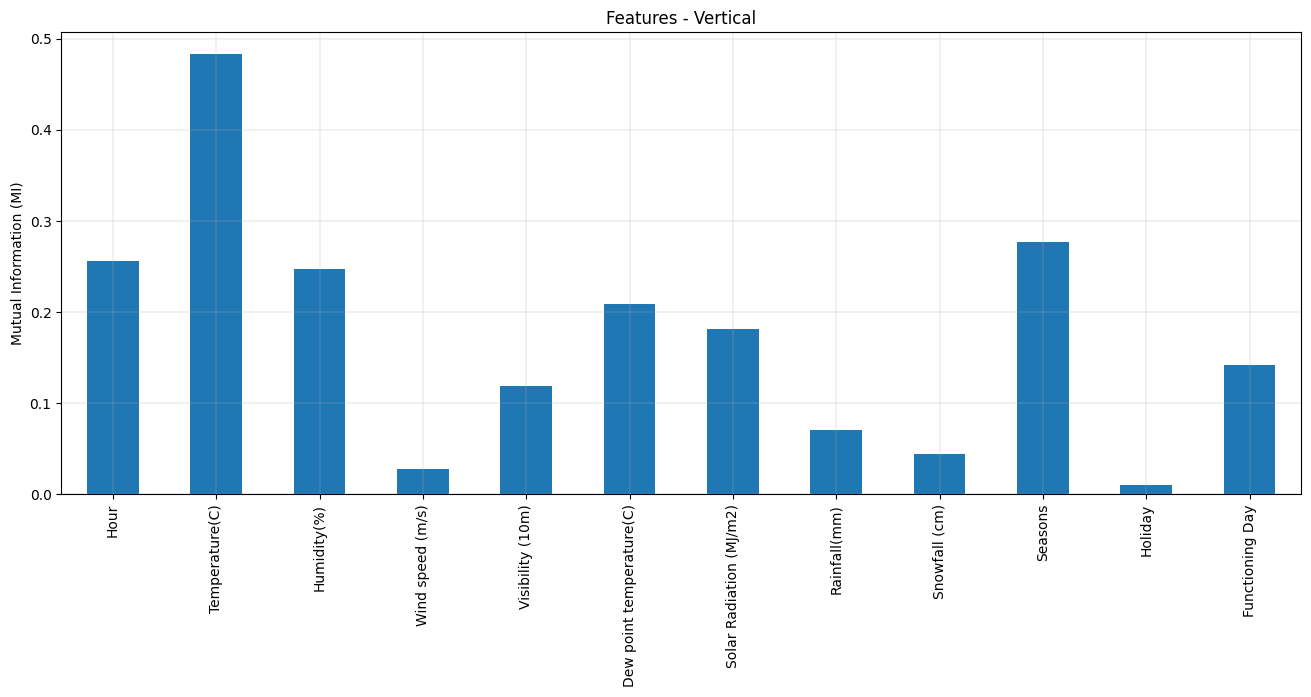

In [120]:
## Visualize the mutual information of each variable (Just run!)
## mt_info is the output of Sklearn function

mt_info_df = pd.Series(mt_info)
mt_info_df.index = X.columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

### Transformando Dados Categóricos

Transofrmando dados categóricos em dados para serem utilizados no modelo .
Para isso iremos utilizar a técnica one-hot encoding (que é uma maneira de representar variáveis categóricas como vetores binários. O Pandas possui uma função integrada chamada get_dummies() que pode ser usada para codificação one-hot)

Faremos o mesmo tratamento para os dados de test.

In [126]:
X_train = pd.get_dummies(X_train, columns=['Seasons', 'Holiday', 'Functioning Day'])
X_test = pd.get_dummies(X_test, columns=['Seasons', 'Holiday', 'Functioning Day'])

In [127]:
X_train

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_0,Functioning Day_1
1444,4,-11.1,50,1.2,1986,-19.4,0.00,0.0,0.0,0,0,0,1,0,1,0,1
1652,20,-5.8,44,2.1,1994,-16.1,0.00,0.0,0.0,0,0,0,1,0,1,0,1
7496,8,11.4,66,0.8,1991,5.2,0.18,0.0,0.0,1,0,0,0,1,0,1,0
1893,21,-2.3,38,2.3,2000,-14.7,0.00,0.0,0.0,0,0,0,1,1,0,0,1
3880,16,19.1,54,3.2,542,9.5,0.94,0.0,0.0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,22,29.9,74,2.0,1201,24.7,0.00,0.0,0.0,0,0,1,0,0,1,0,1
5191,7,23.5,90,0.5,445,21.7,0.05,0.5,0.0,0,0,1,0,0,1,0,1
5390,14,29.5,62,2.7,1941,21.4,1.79,0.0,0.0,0,0,1,0,0,1,0,1
860,20,-3.4,51,1.1,1391,-12.1,0.00,0.0,0.0,0,0,0,1,0,1,0,1


#### Discussion of key points

- How the visualization helped in understanding the data?
- Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)


### How the visualization helped in understanding the data?

Analisando os dados plotados podemos ver que certas features apresentam mais influência que outras para o alvo (Rented Bike Count).

**Sobre os dados quantitativos:**
- A Temperatura, Humidade e Visibilidade se assemelham a um comportamento linear. Já a Radiação Solar e Velocidade do Vento parecem não ter muita influência no número de bicicletas alugadas. Além disso, a quantidade de chuva ou neve parecem forçar um comportamento binário no aluguel de bicicletas, ou seja , se chover ou nevar o número de alugueis de bicicletas é quase nulo.


**Sobre os dados qualitativos:**
- O Horário demonstra ter uma maior atividade no periódo final da tarde-noite (17h - 19h), as Estações mostram ter uma maior atividade no Verão. Já o Feriado mostra não ter muita influência no número de bicicletas alugadas. Agora o Dia de Funcionamento mostra que as bikes só são alugadas caso o estabelecimento esteja funcionando.

### Looking at the mutual information plot, can you find features that seem to be uninfluential? (If so, remember to remove them before next steps!)

Analisando o 'mutual information' conseguimos uma maneira mais racional de entender a dependencia entre duas variáveis. Com isso, fica mais fácil encontrar features que não influenciam ou influencia de forma insignificativa a número de bicicletas alugadas. Entre elas vamos destacar : **Holiday e Wind Speed**.

In [128]:
#Selecionando apenas as colunas que serão utilizadas para treinamento. Retirando as features que com baixa significanicia segundo nosso grupo

X_train = X_train.drop(columns=[ "Holiday_Holiday", "Holiday_No Holiday", "Wind speed (m/s)" ]) 
X_test = X_test.drop(columns=[ "Holiday_Holiday", "Holiday_No Holiday", "Wind speed (m/s)" ]) 

X_train


,Hour,Temperature(C),Humidity(%),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_0,Functioning Day_1
1444,4,-11.1,50,1986,-19.4,0.00,0.0,0.0,0,0,0,1,0,1
1652,20,-5.8,44,1994,-16.1,0.00,0.0,0.0,0,0,0,1,0,1
7496,8,11.4,66,1991,5.2,0.18,0.0,0.0,1,0,0,0,1,0
1893,21,-2.3,38,2000,-14.7,0.00,0.0,0.0,0,0,0,1,0,1
3880,16,19.1,54,542,9.5,0.94,0.0,0.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,22,29.9,74,1201,24.7,0.00,0.0,0.0,0,0,1,0,0,1
5191,7,23.5,90,445,21.7,0.05,0.5,0.0,0,0,1,0,0,1
5390,14,29.5,62,1941,21.4,1.79,0.0,0.0,0,0,1,0,0,1
860,20,-3.4,51,1391,-12.1,0.00,0.0,0.0,0,0,0,1,0,1


### **Implement and train the a Linear Regressor** (2.5 points)

You should complete the implementation of the `MyLinearRegressor` class and of the `MSE` loss function started below. No machine learning libraries are allowed for this.

The common regression metrics used to understand model perfomance are the Mean Squared Error (MSE), Mean Absolute Error (MAE) and Coefficient of determination(R²). You can implement your own version of those metrics or use it from sklearn. Compare the different metrics.

In [129]:
# TODO: MSE Loss. You cannot use machine learning libraries for this!!

def MSE( y, f):
  """
    Calculate the Mean Squared Error (MSE) loss between the true labels and the predicted labels.

    Parameters:
    y : array of the true samples
    f : array of predictions

    Returns: MSE
    """
  
  return np.sum((y - f) ** 2) / len(y)

In [130]:
# TODO: Finish the implementation of MyLinearRegressor.
class MyLinearRegressor():
  def __init__(self, learning_rate=-1, max_iter=-1):
    self.max_iter         = max_iter
    self.learning_rate    = learning_rate
    self.weights          = None
    self.bias             = None

  def predict(self, X):
    """
        Just replace the inputs in the prediction function
    """
    if self.weights is not None and self.bias is not None :
          return  np.dot(X, self.weights.T) + self.bias
  

  def fit(self, X, y):
    """
        Fit linear regression model to the training data.

        Parameters:
        X :Training data.
        y : Target values.

        Returns: self
    """
    n_samples = len(y)
    n_features = X.shape[1]
    self.weights = np.zeros(n_features) # betha vector
    self.bias = 0

    for i in range(self.max_iter):
     
      y_pred = self.predict(X)

      # GRADIENTE DESCENDENTE
      """"
      d/dB_m MSE = -2/n * Sum (y - y_pred) * x_im 
      ---> Essa é a derivada parcial para B_m, que utilizando produto escalar podemos reduzir para:
      d/dB_m MSE = -2/n (x_m.T)*(y - y_pred) 
      ---> Se quisermos calcular de forma vetorial e calcular o vetor B contendo todos os B_i ( i = {1.. p}) podemos utilizar um produto vetorial com a matriz X
      vectorB = -2/n (X.T)*(y - y_pred)

      ---> A mesma lógica se aplica para o bias, porém o x_im é sempre 1, pois não há variável acompanahdo o coeficiente B_0
      """
      d_weights = (-2 / n_samples) * np.dot(X.T, (y - y_pred))
      
      d_bias = (-2 / n_samples) * np.sum(y - y_pred)

      # ATUALIZAR PARAMETROS
      self.weights -= self.learning_rate * d_weights
      self.bias -= self.learning_rate * d_bias

        
    return self

#### Discussion of key points

- Looking at the different metrics proposed, what is the best one for this problem?
- Your Linear Regressor was able to closely estimate the amount of bikes rented per hour? Justify using a machine learning metric.
- What do you think is the biggest error type in your model: variance or bias?

## Looking at the different metrics proposed, what is the best one for this problem?

Analisando as possíveis métricas vemos que o melhor a ser analisado seria o MSE, pois esse acaba penalizando valores que sejam muito diferentes entre o previsto e o real, os conhecidos outliers, ou seja, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões . 
E como vemos pelos nosso erro, este ficou com uma ordem de grandeza muito alta.

Enquanto o cálculo do MAE também leva em conta o erro médio nos dando uma previsão do modelo estar errando em média 750 tanto para mais quanto para menos em relação ao valor correto, porém não penaliza os outliers.

Já o R² pode nos enganar devido sua métrica. Tal erro gira em torno de 0 a 1 , ou seja, de 0% a 100%, com isso não temos muitas informações do quão próximo de 100% seria melhor para o modelo. No nosso caso, não sabemos se 62% seria o suficiente para um modelo bem sucedido. 

Concluindo, vemos que se conseguirmos diminuir o MSE tratando os outilers, acabaremos diminuindo o MAE e consequentemente melhorando o R². Por isso, o escolhemos como melhor métrica a ser analisada nos erros. 

## Your Linear Regressor was able to closely estimate the amount of bikes rented per hour? Justify using a machine learning metric.

A partir do modelo feito, podemos então instanciar a classe e testá-lo com um 'learning rate' de 1% e 1000 iterações.

A partir das análises dos erros, em especial o ... , podemos verificar que nosso modelo ...

In [131]:
# Fazendo uma normalização dos dados com o StandarScaler do SKLearn

# Inicializar o objeto StandardScaler
scaler = StandardScaler()

# Ajustar e transformar os dados de treinamento
X_train = scaler.fit_transform(X_train)

# Apenas transformar (sem ajustar novamente) os dados de teste
X_test = scaler.transform(X_test)

X_train  


array([[-1.09359218, -2.02557075, -0.40155174, ...,  1.76898076,
        -0.18831089,  0.18831089],
       [ 1.23323198, -1.58026093, -0.69489404, ...,  1.76898076,
        -0.18831089,  0.18831089],
       [-0.51188614, -0.13510455,  0.3806944 , ..., -0.56529727,
         5.31036722, -5.31036722],
       ...,
       [ 0.36067292,  1.38567048,  0.18513286, ..., -0.56529727,
        -0.18831089,  0.18831089],
       [ 1.23323198, -1.37861121, -0.35266136, ...,  1.76898076,
        -0.18831089,  0.18831089],
       [ 1.524085  ,  0.52865914, -0.15709982, ..., -0.56529727,
        -0.18831089,  0.18831089]])

In [132]:

# Instanciando o regressor linear com os parâmetros desejados
regressor = MyLinearRegressor(learning_rate=0.01, max_iter=1000)

# Treinando o modelo com os dados de treinamento X e y
regressor.fit(X_train, y_train)

# Prever os valores do conjunto de teste
y_pred = regressor.predict(X_test)

# Calcular as métricas de avaliação para o MyLinearRegressor
mse = MSE(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir os resultados para o MyLinearRegressor
print("Mean Square Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Coefficient of determination (R²):", r2)

Mean Square Error (MSE): 987577.8175228054
Mean Absolute Error (MAE): 751.3255294927203
Coefficient of determination (R²): 0.6234151474032155


### **Compare with SGDRegressor** (0.5 point)

After training your regressor, train a `SGDRegressor` from sklearn and compare both.

In [133]:
# TODO: Traing the SGDRegressor. You should use sklearn libraries.
from sklearn.linear_model import SGDRegressor

# Inicializar e treinar o SGDRegressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)

# Prever os valores do conjunto de teste
y_pred_sgd = sgd_regressor.predict(X_test)

# Calcular as métricas de avaliação para o SGDRegressor
mse_sgd = MSE(y_test, y_pred_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Imprimir os resultados para o SGDRegressor
print("Mean Square Error (MSE):", mse_sgd)
print("SGDRegressor Mean Absolute Error (MAE):", mae_sgd)
print("SGDRegressor Coefficient of determination (R²):", r2_sgd)

Mean Square Error (MSE): 978623.3458695521
SGDRegressor Mean Absolute Error (MAE): 746.7994870627466
SGDRegressor Coefficient of determination (R²): 0.6268296817596888


### Comparação

Podemos fazer uma análise quantitativa baseado na proximidade das métricas de avalisações dos dois modelos. Para isso vamos analisar quantitavamente as razões entre esas métrias.

Podemos ver abaixo que as razões são muito próximas de 100% = 1.00 , nos indicando que os modelos tem qualidades similares em sua regressão linear.



In [134]:
# Calcular as razões entre as métricas 
mse_ratio = mse / mse_sgd
mae_ratio = mae / mae_sgd
r2_ratio = r2 / r2_sgd

# Imprimir as razões
print("MSE ratio :", mse_ratio)
print("MAE ratio :", mae_ratio)
print("R² ratio :", r2_ratio)

MSE ratio : 1.0091500695247535
MAE ratio : 1.0060605858846732
R² ratio : 0.9945526919738584


## What do you think is the biggest error type in your model: variance or bias?

Como o modelo apresenta um MSE bastante elevado, indica que este modelo está cometendo grandes erros em suas previsões. O que nos mostra que tal modelo pode estar sofrendo de alta variância, ou seja, o modelo esta se ajustando aos dados ao invés de tentar generalizar para entender melhorar o contexto geral da função, ou seja, implicando em um possível overfitting, onde o modelo é muito complexo para o conjunto de dados disponível.


Já a métrica de erro R² levemente moderado, indicando que o modelo explica uma parte , mas não tudo, da variabilidade dos dados . Talvez seria necessário uma valor bem maior para o ajuste dos dados.

Com isso, parece que o maior tipo de erro nesse modelo seria a VARIÂNCIA . Dessa forma, nos permite inferir que o modelo está complexo demais e com isso tenta decorar demais os padrões dos dados o que resulta num desempenho ruim para a generalização e previsão dos testes.


### **EXTRA: Find interaction terms** (0.5 point)

In the "An Introduction to Statistical Learning" book, in chapter 3, the authors explain how different terms can interact with each other, and this interaction can have a bigger correlation with the target.

In this extra task, search for relation of columns that can enhance the results of the model.<br/>
The interaction could be to sum, subtract, multiply or divide two columns by each other. Choose some relations to test between some of the columns. <br/>
To do this, you can use the `mutual_information` technique to test wheter the new columns have bigger Mutual Information.

You should train your own model **not** the Sklearn one.



In [ ]:
# Reload the dataset

In [ ]:
# Transform features

In [ ]:
# Check mutual information

In [ ]:
# Re-train and test the model

## **K-Nearest Neighbors (KNN) Classifier**

In this section you must load and explore the dataset, and train a K-Nearest Neighbors (KNN) classifier. You can (and should) use the Sklearn library to it.

Remember to avoid using data that you should not have in training when performing the data analysis.

#### **Dataset: In-vehicle coupon recommendation**

This dataset was built using Amazon Mechanical Turk, which is a tool to apply surveys to a specific range of users.

The applied survey was made by asking user for demographic informations, and then presenting 20 driving scenarios and possible coupon offers.
<br/>
The users had to answer if they would want the coupon or not.

The focus of this dataset was to understand how to correct apply advertsiment of in-vehicle coupons.

Features and the corresponding descriptions:
- **destination**: Destination of the driving scenario. Options: No Urgent Place, Home, Work
- **passanger**: People in the car of the driving scenario. Options: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- **weather**: Weather of the driving scenario. Options: Sunny, Rainy, Snowy
- **temperature**: Temperature of the driving scenario. Options: 55, 80, 30
- **time**: Hour of the driving scenario. Options: 2PM, 10AM, 6PM, 7AM, 10PM
- **coupon**: Type of coupon offered. Options:
  - Restaurant(< \\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
- **expiration**: Expiration of the coupon in the scenario. Options: 1d, 2h (the coupon expires in 1 day or in 2 hours)
- **gender**: Gender of the person answering the survey. Options: Female, Male
- **age**: Age of the person answering the survey. Options: 21, 46, 26, 31, 41, 50plus, 36, below21
- **maritalStatus**: Marital status of the person answering the survey. Options: Unmarried partner, Single, Married partner, Divorced, Widowed
- **has_Children**: If the person answering the survey has children. Options:1, 0
- **education**: Edducation level of the person answering the survey. Options: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
- **ocupation**: Ocupation of the person answering the survey. Options:
  - Unemployed, Architecture & Engineering, Student, Education&Training&Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- **income**: Anual income of the person answering the survey. Options:
  - \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499, \\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- **Bar**: Question: how many times do you go to a bar every month? Options: never, less1, 1\~3, 4\~8, gt8, nan
- **CoffeeHouse**: Question: how many times do you go to a coffeehouse every month? never, less1, 4\~8, 1\~3, gt8,  nan
- **CarryAway**: Question: how many times do you get take-away food every month? Options: n4\~8, 1\~3, gt8, less1, never
- **RestaurantLessThan20**: Question: how many times do you go to a restaurant with an average expense per person of less than $20 every month? Options: 4\~8, 1\~3, less1, gt8,  never
- **Restaurant20To50**: Question: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month? Options: 1\~3, less1, never, gt8, 4\~8,  nan
- **toCoupon_GEQ15min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 15 minutes in the driving scenario. Options: 0,1
- **toCoupon_GEQ25min**: Indicator if the driving distance to the restaurant/bar for using the coupon is greater than 25 minutes in the driving scenario. Options: 0,1
- **direction_same**:  Indicator whether the restaurant/bar is in the same direction as your current destination in the driving scenario. Options: 0,1
- **direction_opp**: Indicator whether the restaurant/bar is in the opposite direction as your current destination. Options: 1, 0
- **Y**: Wheter the coupon was accepted. Options: 1, 0

**How to load the dataset**

As you already copied the folder in the first part of this task, you can just directly load the dataset.

*If you want to run the notebook locally, change the path below to the location of the folder in your local environment.*

In [164]:
# load dataset from local file
path = "in-vehicle-coupon-recommendation.csv" # Caminho local para a mesma pasta
vehicle_data = pd.read_csv(path)

### **Data analysis and preprocessing** (1.5 point)

In this section, you should explore the dataset.
This should be done as in the Linear Regressor section, paying attention to mutual information (now using [`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)) and categorical features.

Check for missing values before changing the dataset and explore how to deal with them (removing? filling with mean/median/random? Etc).

Remember that machine learning models are highly affected by the scale of the input features.


In [165]:
## Analisando o dataset

print("COLUNAS")
print(vehicle_data.columns)

print("DATA\n")
print(vehicle_data)

print("\nSUM OF NULL ENTRIES PER COLUMN\n")
print(vehicle_data.isnull().sum())

print("\nDATA TYPES\n")
print(vehicle_data.dtypes)


COLUNAS
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
DATA

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy       

### Tratamento de Dados Nulos

- Analisando a tabelas de entradas nulas por coluna vemos que a coluna **car** apresenta 12576 linhas nulas e como nem aparece no enunciado vamos excluí-la.

- Outro ponto é que as colunas **Bar, CoffeHouse, CarryAway, RestaulantLessThan20 e Restaurant20To50** apresentam entradas nulas, somando todas essas entradas totalizam 794 ocorrências. No pior caso temos 794 linhas, já que pode haver casos de mais de uma entrada nula em uma mesma linha em diferentes colunas. Com isso, ao comparar com o número total de linhas, 12684, essas 794 representam apenas 6,3% . Portanto, podemos considerar a exclusão dessas linhas como uma abordagem a ser tomada, pois a perda de dados seria relativamente baixa.

- Como podemos ver abaixo, apenas (12684 - 12079) = 605 linhas foram excluidas = 4,8% do número total de linhas

In [166]:
vehicle_data = vehicle_data.drop(columns =['car'])

In [167]:
vehicle_data_no_null = vehicle_data.dropna()

print("Linhas após a exclusão de valores nulos:", len(vehicle_data_no_null))


Linhas após a exclusão de valores nulos: 12079


In [168]:
print("\nSUM OF NULL ENTRIES PER COLUMN AFTER DELETING\n")
print(vehicle_data_no_null.isnull().sum())


SUM OF NULL ENTRIES PER COLUMN AFTER DELETING

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


### Separando os Dados (Treino x Teste)

Agora que já tratamos as entradas vazias podemos, então, separar os dados entre Treino e Teste.

In [169]:
#Training data
X = vehicle_data_no_null.drop(columns=['Y']) 
#Target variables
y = vehicle_data_no_null['Y']

# Divisão dos dados para o momento de Treinamento e para o momento de Test/Validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
X_train

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
2979,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,31,Married partner,...,never,less1,4~8,less1,less1,1,0,0,1,0
1718,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,26,Married partner,...,never,less1,1~3,1~3,never,1,0,0,1,0
7069,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Male,26,Married partner,...,less1,less1,1~3,1~3,less1,1,1,0,0,1
842,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Male,50plus,Married partner,...,never,never,less1,1~3,less1,1,1,0,0,1
255,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Single,...,1~3,never,4~8,1~3,less1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Single,...,never,never,1~3,1~3,less1,1,1,0,0,1
5451,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,50plus,Single,...,never,never,less1,less1,never,1,1,0,1,0
5650,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,36,Single,...,less1,4~8,4~8,1~3,less1,1,1,1,0,1
938,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,31,Single,...,1~3,4~8,4~8,4~8,4~8,1,1,0,0,1


### Mutual Information


In [171]:

# Separando os dados em outra variável que vão ser tratados com OrdinalEncoder
vehicle_data_mutual = X_train.copy()

#Separar os dados em X e y
X = vehicle_data_mutual
y = y_train

# Inicializar o OrdinalEncoder e ajustar e transformar os dados categóricos
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)


# Calcular a mutual information para cada característica em relação à variável alvo
mt_info = mutual_info_classif(X_encoded, y)

# Criar um DataFrame para visualizar os resultados

mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mt_info})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Imprimir os resultados
print(mi_df)

                 Feature  Mutual Information
5                 coupon            0.041297
15           CoffeeHouse            0.013534
0            destination            0.010820
1              passanger            0.009387
12            occupation            0.009299
2                weather            0.008710
6             expiration            0.008352
14                   Bar            0.007716
22        direction_same            0.005631
19      toCoupon_GEQ5min            0.005045
10          has_children            0.004831
21     toCoupon_GEQ25min            0.003716
13                income            0.002565
9          maritalStatus            0.002252
20     toCoupon_GEQ15min            0.002152
3            temperature            0.001953
18      Restaurant20To50            0.000000
4                   time            0.000000
17  RestaurantLessThan20            0.000000
16             CarryAway            0.000000
11             education            0.000000
8         

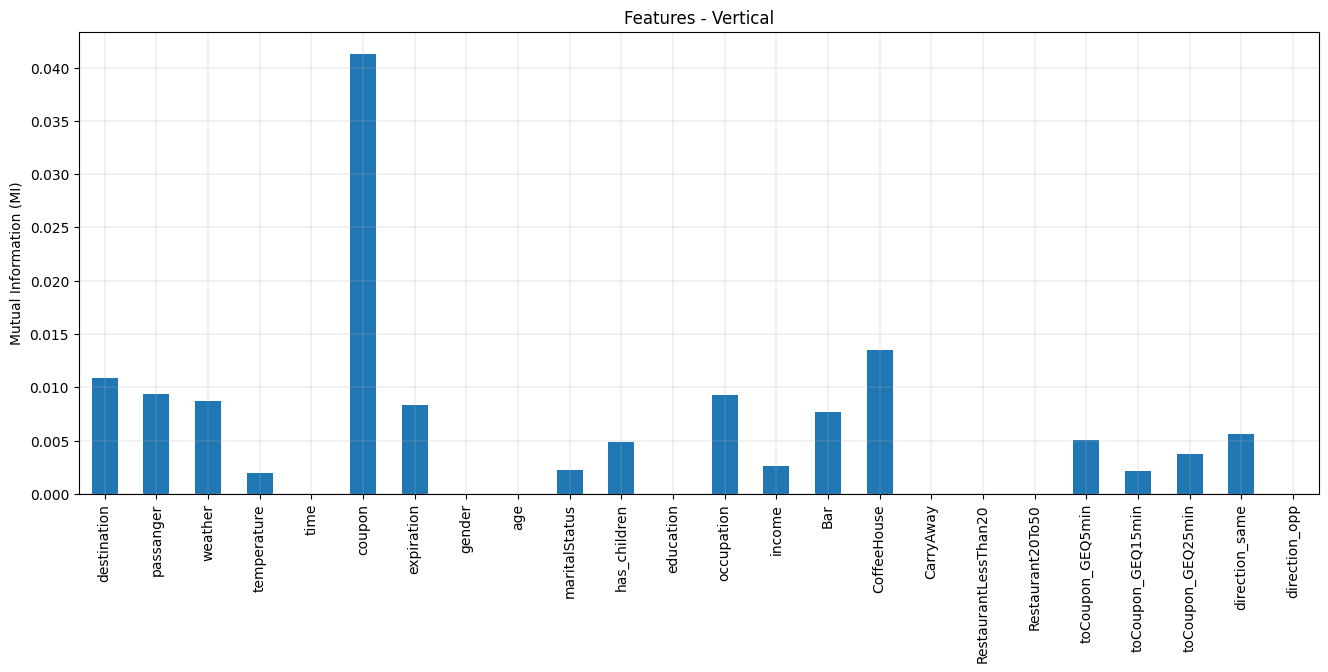

In [172]:
## Visualize the mutual information of each variable (Just run!)
## mt_info is the output of Sklearn function

mt_info_df = pd.Series(mt_info)
mt_info_df.index = X.columns
mt_info_df.plot.bar(figsize = (16,6));
plt.ylabel('Mutual Information (MI)')
plt.title('Features - Vertical')
plt.grid(linewidth=0.25)
plt.show()

## Tratamento de Dados

Vemos que o mutual information de quase todas as variáveis ficaram bem baixos. Dessa forma, optamos por retirar da análise apenas aquelas colunas que o mutual information aparenteu ser nulo devido o número de significância aboradado.

Com isso, vamos retirar as seguintes colunas: **Restaurant20To50, RestaurantLessThan20, education, CarryAway, age, gender,  direction_opp**   

In [174]:

colunas_para_remover = ['Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'education', 'age', 'gender', 'direction_opp']

X_train = X_train.drop(colunas_para_remover, axis=1)
X_test = X_test.drop(colunas_para_remover, axis=1)

X_train

,destination,passanger,weather,temperature,time,coupon,expiration,maritalStatus,has_children,occupation,income,Bar,CoffeeHouse,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same
2979,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Married partner,1,Computer & Mathematical,$37500 - $49999,never,less1,1,0,0,1
1718,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Married partner,1,Unemployed,$50000 - $62499,never,less1,1,0,0,1
7069,No Urgent Place,Friend(s),Snowy,30,10AM,Carry out & Take away,1d,Married partner,0,Building & Grounds Cleaning & Maintenance,$37500 - $49999,less1,less1,1,1,0,0
842,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Married partner,1,Retired,$87500 - $99999,never,never,1,1,0,0
255,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Single,0,Unemployed,Less than $12500,1~3,never,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Single,0,Student,$12500 - $24999,never,never,1,1,0,0
5451,Work,Alone,Sunny,80,7AM,Coffee House,2h,Single,0,Unemployed,Less than $12500,never,never,1,1,0,1
5650,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Single,1,Education&Training&Library,$25000 - $37499,less1,4~8,1,1,1,0
938,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Single,0,Life Physical Social Science,$50000 - $62499,1~3,4~8,1,1,0,0


## Tratamento dos dados categóricos

Transofrmando dados categóricos em dados para serem utilizados no modelo .
Para isso iremos utilizar a técnica one-hot encoding (que é uma maneira de representar variáveis categóricas como vetores binários. O Pandas possui uma função integrada chamada get_dummies() que pode ser usada para codificação one-hot)

Faremos o mesmo tratamento para os dados de test.

In [175]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,...,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never
2979,80,1,1,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
1718,80,1,1,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
7069,30,0,1,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
842,55,1,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
255,80,0,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12569,80,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
5451,80,0,1,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
5650,80,1,1,1,1,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
938,55,0,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0


#### Discussion of key points

- There were missing values in the dataset? How did you dealt with each one?
- Changing the missing values impacted in the mutual information of features with the target?

### There were missing values in the dataset? How did you dealt with each one?
- Respota feita no tópico **Tratamento de dados nulos** após a parte de **Data analysis and preprocessing**

### Changing the missing values impacted in the mutual information of features with the target?
- PED disse não precisar responder essa !

### **Train a K-Nearest Neighbors Classifier** (2.5 points)


You should use the Sklearn `KNeighborsClassifier` function to fit the data.

You can use different metrics such as accuracy and f1-score from Sklearn (or create your own implementation) to understand the model's performance.

Also, plot a confusion matrix to analyze the results.
A Confusion matrix is a matrix were the columns represent the true label, and rows represent the predicted label. As this is a binary classification task, the matrix should have 2x2. You can study more about it [here](https://en.wikipedia.org/wiki/Confusion_matrix). You can use sklearn functions that help in building and displaying it.

In [176]:
# Imports para o Treinamento do KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# Trienamento do modelo de classificação KNN

# Inicializar e treinar o SGDRegressor
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Prever os valores do conjunto de teste
y_pred = knn_classifier.predict(X_test)

In [178]:
# Calcular as métricas de avaliação
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir as métricas de avaliação
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.6923289183222958
F1 Score: 0.7373380447585395


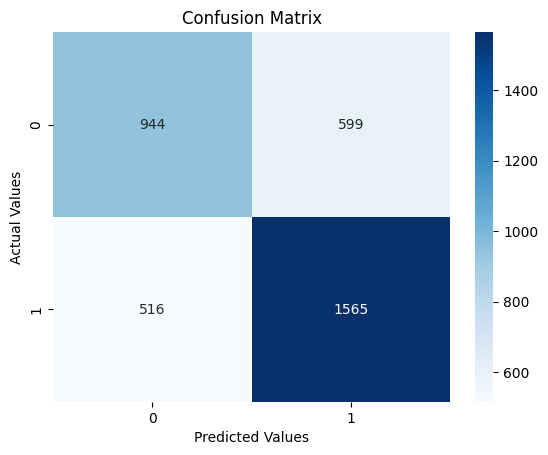

In [181]:

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- What was the best K for this problem? How the selection o K impacts the Bias-variance tradeoff?

### Is accuracy a good metric for this problem? Justify.

A acurácia mede a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo. No entanto, em problemas de classificação binária com classes desbalanceadas, a acurácia pode não ser a métrica mais informativa. Um classificador simples que prevê sempre a classe majoritária pode ter alta acurácia, mas não é útil na prática, pois não aprende padrões nos dados.

### What conclusions can you have when looking your results in the confusion matrix?
A matriz fornece uma visão detalhada do desempenho do classificador, mostrando o número de :
- verdadeiros positivos (TP = 11) = 1565
- falsos positivos (FP = 01) = 599
- verdadeiros negativos (TN = 00) = 944
- falsos negativos (FN = 10) = 516

Com isso, vemos que somando TP e TN temos 2509 entradas verdadeiras. Enquanto, a soma de FP e FN temos 1115 entradas falsas. Logo, conseguimos chegar na acurácia de 2509 / (2509 + 1115) = 0.692

Observando apenas a matriz vemos que as cores mais fortes vem de TP e TN e as mais fracas de FP e FN, o que, visualmente indicaria uma acurácia moderada, já que os resultados verdadeiros estão em maior presença que os resultados falos e como calculado vemos uma acurácia próxima de 70%. Ou seja, poderíamos deduzir que uma diagonal principal mais escura tende a nos dar melhores acurácias.

### What was the best K for this problem? How the selection o K impacts the Bias-variance tradeoff?

O melhor valor de K é descoberto a partir da análise de testes. Em outras palavras, seria necessário testar diversos valores de K e analisar seu desempenho a partir de métrias como acurácia, f1-score, entre outras. Com isso, o melhor desempenho vai nos levar a um melhor K, já que precisamos analisar o Bias-variance tradeoff, uma vez que ao se variar o K podemos aumentar ou diminuir a variância ou o viés.

Um valor de K muito baixo pode levar a um modelo com baixa suavização e consequentemente alta variância e baixo viés, ou seja, o modelo esta mais suscetível a flutuações nos dados de treinamento. Com isso, pode levar ao overfitting, quando o modelo se ajusta demais aos dados de treinamento, como se tivesse decorando eles, capturando o ruído dos dados. 

Um valor de K muito alto pode levar a um modelo com alta suavização e consequentemente alto viés e baixa variância, ou seja, o modelo esta mais suscetível a flutuações nos dados de treinamento. Com isso, pode levar ao underfitting. Um modelo com alto valor de K faz previsões com um número de vizinhos muito alto, o que suaviza as decisões do modelo e reduz a tendência de se ajustar aos dados de treinamento.

Dessa forma, O Bias-variance tradeoff se torna necessário para tentar equilibrar esses dois componentes e, então, obter um modelo que generalize bem os dados de treinamento.

## **Multiclass classification** (1 point)

In this last section you should adapt the "**Seoul Bike Sharing Demand**" dataset target, creating an arbitrary number N of classes, where 2 < N < 11.

Classes should represent equally spaced intervals in the continuous target of the original dataset(`Rented Bike count`).<br/>
For example, if N == 3, we should have 3 classes. Given that $\hat{x}$ is the maximum value of the known `Rented Bike count` in train dataset, samples with y <= $\hat{x}/3$ should be of class 0, samples y > $\hat{x}/3$ but y <= $2*\hat{x}/3$ should be of class 1, and samples where y > $2*\hat{x}/3$ should be of class 2.

You can use the Sklearn KNN classifier for this task, as well as any sklearn helper functions. Remember to carefully perform the needed preprocess steps discussed in other sections (if necessary).

Plot a confusion matrix with the results.

## Preparando os Dados

In [262]:
# Carregar o conjunto de dados novamente
bike_data = pd.read_csv("SeoulBikeData.csv")

# Dividir o conjunto de dados em features (X) e target (y)
X = bike_data.drop(columns=['Rented Bike Count', 'Date'])
y = bike_data['Rented Bike Count']

In [275]:
N = 3

In [276]:
# Separando o target (y) em N classes, de 0 a N - 1
limites_classes= np.linspace(0, y.max()+0.1, N + 1)

for i in range(N):
    print("Classe {}: {} > x > {}".format(i, limites_classes[i],limites_classes[i+1]))

y_classes = pd.cut(y, bins = limites_classes, labels=False, right=False)


print("Contagem de entradas nulas: ", y_classes.isnull().sum())


# Fazer a contagem da frequencia de cada classe por classe
count = [0] * (N)

for i in range(len(y)):
    if not np.isnan(y_classes[i]):  # Verifica se o valor não é NaN
        count[ int(y_classes[i])] += 1

print(count)

Classe 0: 0.0 > x > 3170.366666666667
Classe 1: 3170.366666666667 > x > 6340.733333333334
Classe 2: 6340.733333333334 > x > 9511.1
Contagem de entradas nulas:  0
[7677, 895, 188]


In [277]:
# Dividir os dados em conjuntos de treinamento e teste, com teste = 30% e treinamento = 70%
X_train, X_test, y_train, y_test = train_test_split(X, y_classes, test_size=0.3, random_state=42)

# Fazendo o tratamento de dados categóricos
X_train = pd.get_dummies(X_train, columns=['Seasons', 'Holiday', 'Functioning Day'])
X_test = pd.get_dummies(X_test, columns=['Seasons', 'Holiday', 'Functioning Day'])

# Normalizando os dados 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Treinamento do Classificador KNN

In [278]:
# Inicializar e treinar o classificador
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Prever os resultados
y_pred = knn_classifier.predict(X_test)

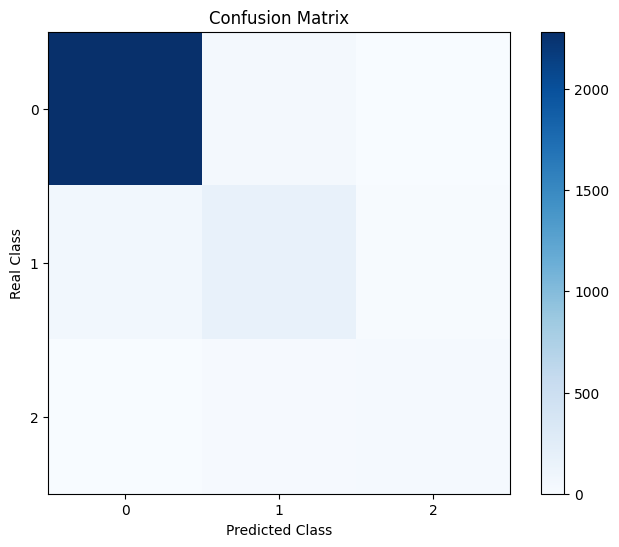

In [279]:
# Calcular a matriz
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Real Class')
plt.xticks(np.arange(N), labels=np.arange(N))
plt.yticks(np.arange(N), labels=np.arange(N))
plt.show()

In [280]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :", accuracy) 

Accuracy : 0.9467275494672754


#### Discussion of key points

- Is accuracy a good metric for this problem? Justify.
- What conclusions can you have when looking your results in the confusion matrix?
- There is value in solve a regression problem as a multiclass classification problem?

## Is accuracy a good metric for this problem? Justify.

Sim, podemos contar com ela já que estamos esticando em subintervalos, ou seja, podemos conseguir uma acuracia razoavel com o tradeoff do n´pumero de intervalos

## What conclusions can you have when looking your results in the confusion matrix?
Para esse caso em especifico, o número de falsos negativos é muito baixo, porém tinhamos poucos dados de classes mais altas

## There is value in solve a regression problem as a multiclass classification problem?
Sim, podemos ajustar a acurácia com o numero de intervalos, ao ponto que podemos estabelecer len(y) numero de intervalos e teremos uma acuracia baseada em um intervalo que representaria apenas uma amostra. O que claramente seria uma acuracia baixa. Porem assim podemos perder um pouco de precisão mas ganhamos um pouco de acurácia ao se intervalar as respostas